In [160]:
import numpy as np
from matplotlib import pyplot,cm as plt,cm
from scipy.interpolate import *
from ReferenceElement import *
import os
import imageio
from DG_functions import *

# Testing

In [294]:
N = 6
K = 4
CF = 2.**(-7)
start = 0.
end = 1.
a = 1.
alpha = 1./2.
h = (end-start)/K
t = 0.


reference_element = ReferenceElement(N)
reference_interval = reference_element[0]
M_inv = reference_element[1]*2/h
M_inv_S = reference_element[2]*2/h


In [295]:
def initial_condition_1(x,t):
    return np.exp(-2*np.cos(2*np.pi*(x-t)))
#     return np.sin(2*np.pi*(x-t))
def derivative_ic1(x,t):
    return -4*np.pi*np.sin(2*np.pi*((x-t)))*initial_condition_1(x,t)

In [296]:
x = get_x_elements(start,end, K, reference_interval)
u = initial_condition_1(x,t)

In [297]:
dx_min = get_dx_min(x)
dt = CF*dx_min

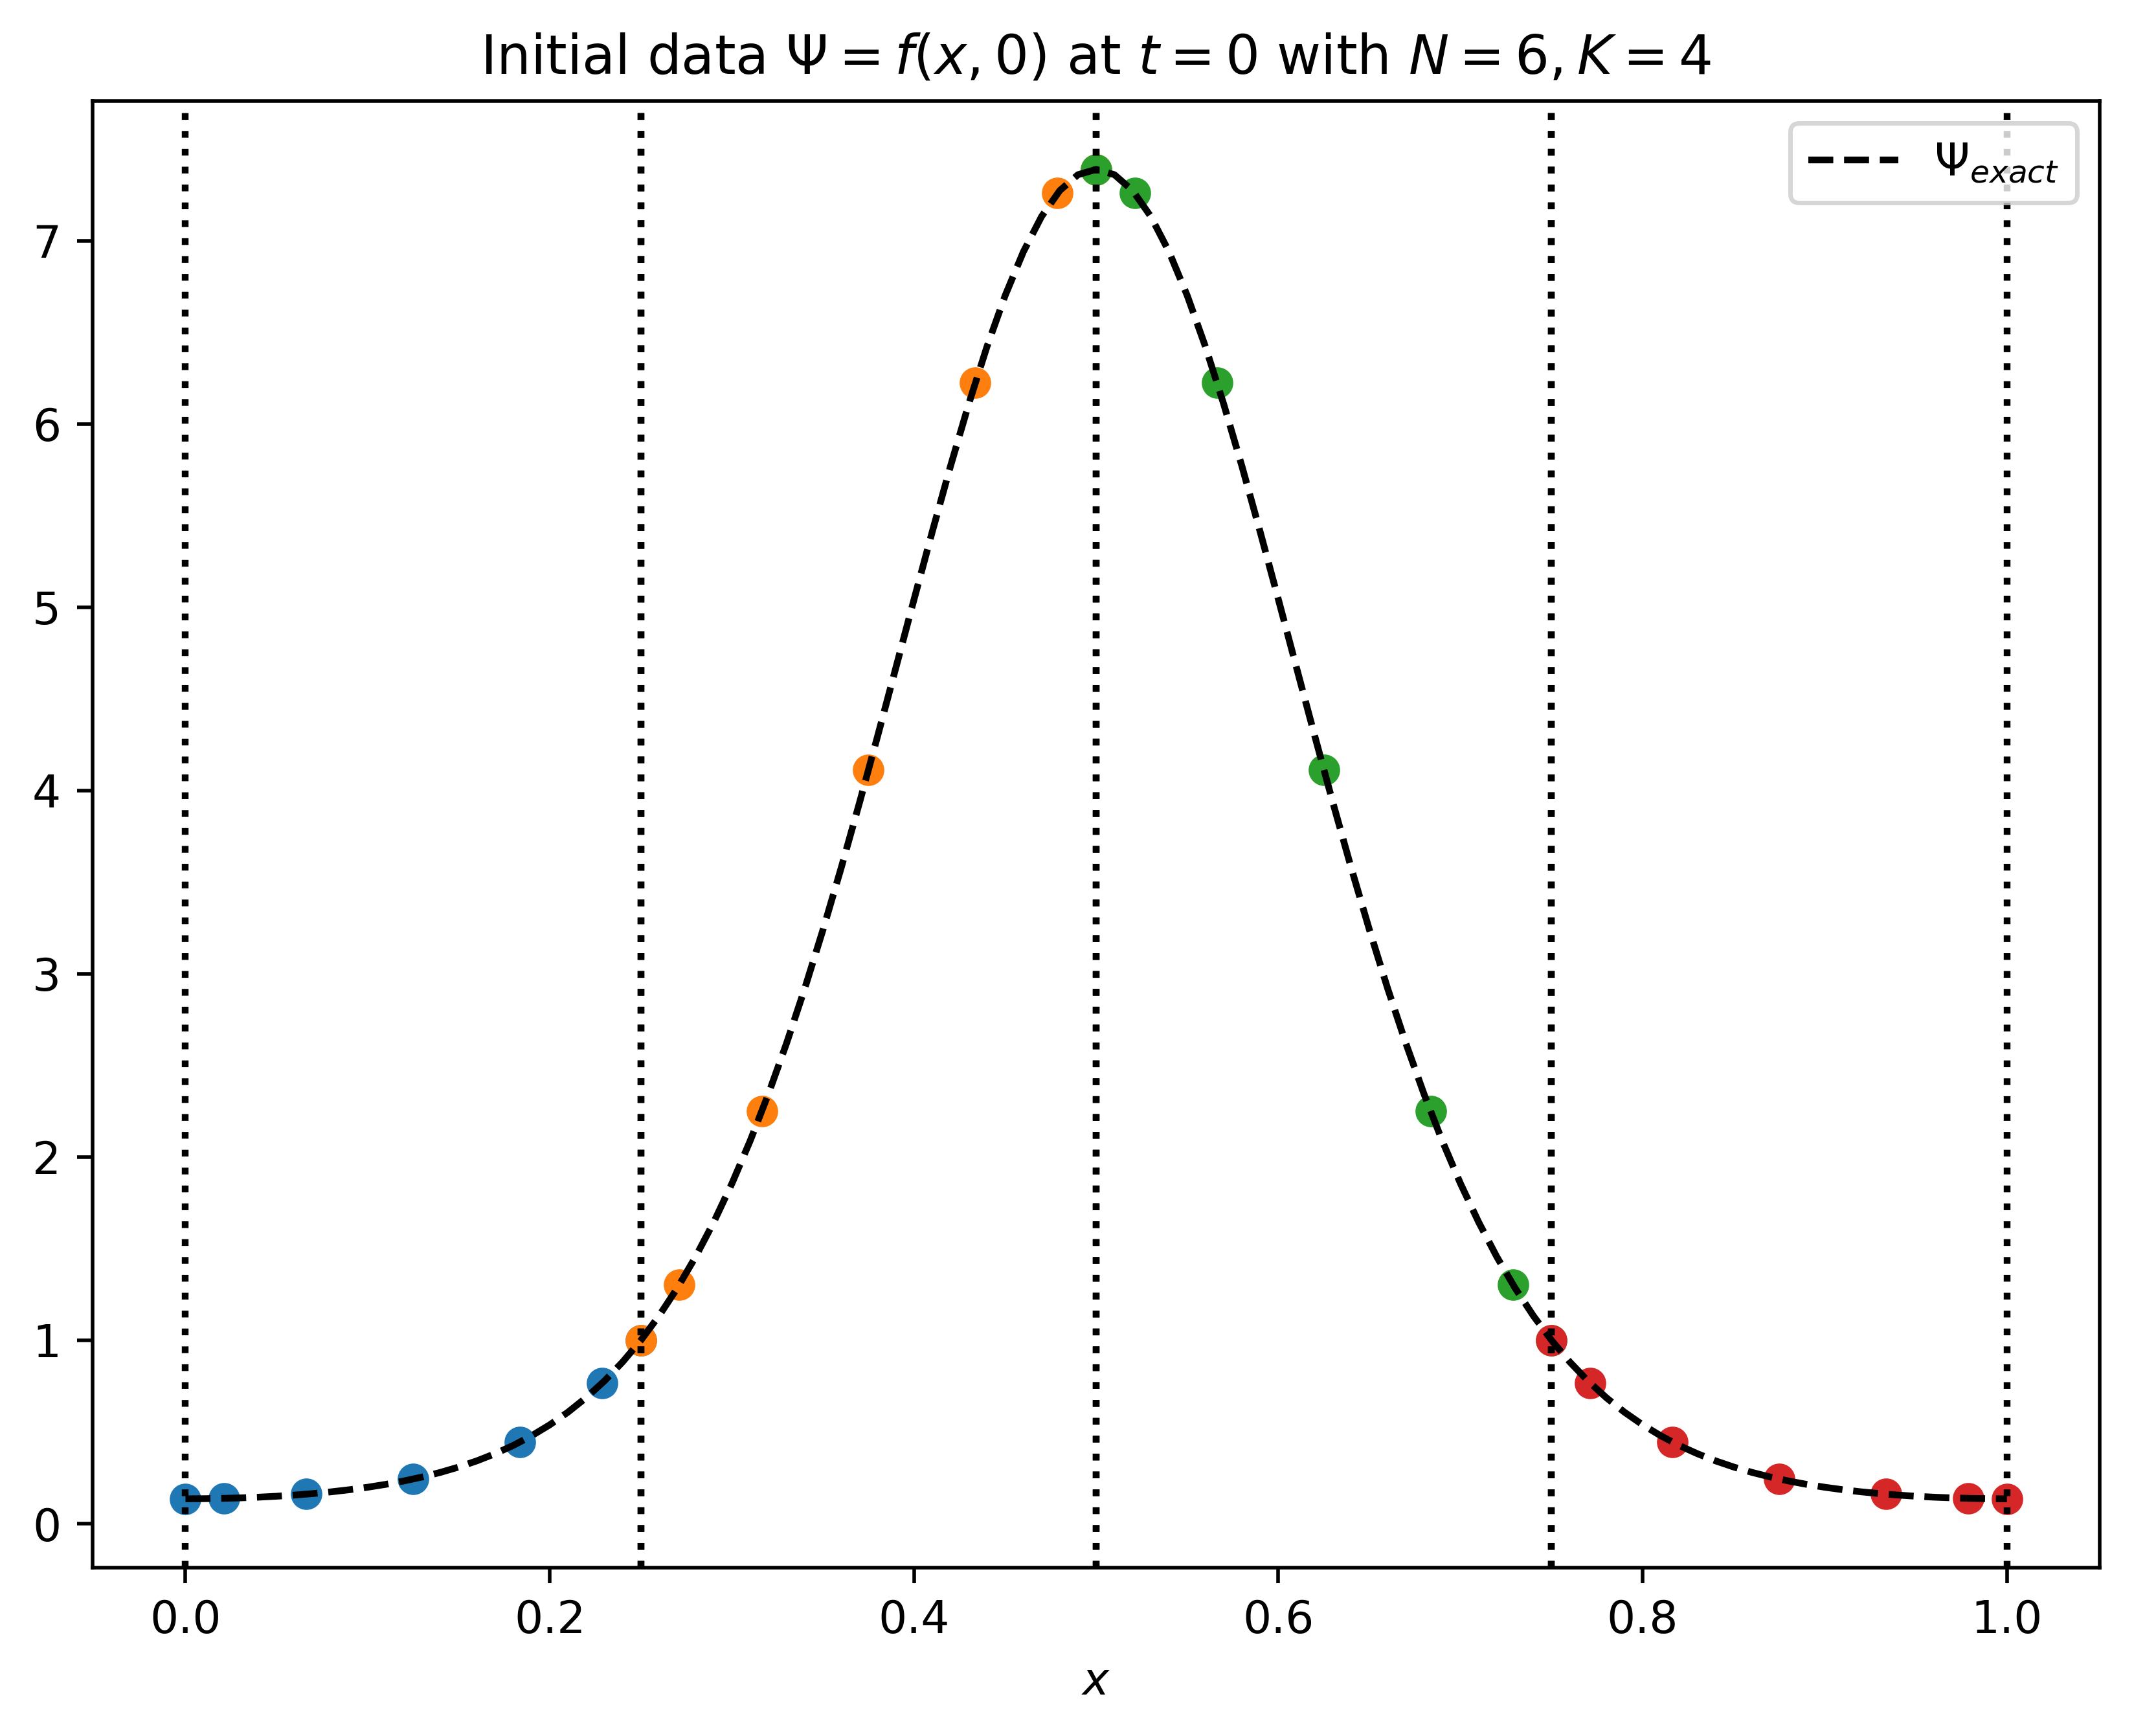

In [298]:
plt.figure(figsize=(8,6), dpi=500)
for i in range(len(x)):
    plt.scatter(x[i],u[i],marker = 'o')
    plt.axvline(x[i][-1],ls=':', color = 'black')
    plt.axvline(x[i][0], ls =':',color = 'black')
plt.title(r'Initial data $\Psi = f(x,0)$ at $t=0$ with $N=6,K=4$')
plt.xlabel(r'$x$')
plt.plot(x_smooth, initial_condition_1(x_smooth,t), label = r'$\Psi_{exact}$',ls = '--', color = 'black')
plt.legend()


In [299]:
derivative_0 = DG_du_dt(u, K, N, t, a,alpha,M_inv, M_inv_S)

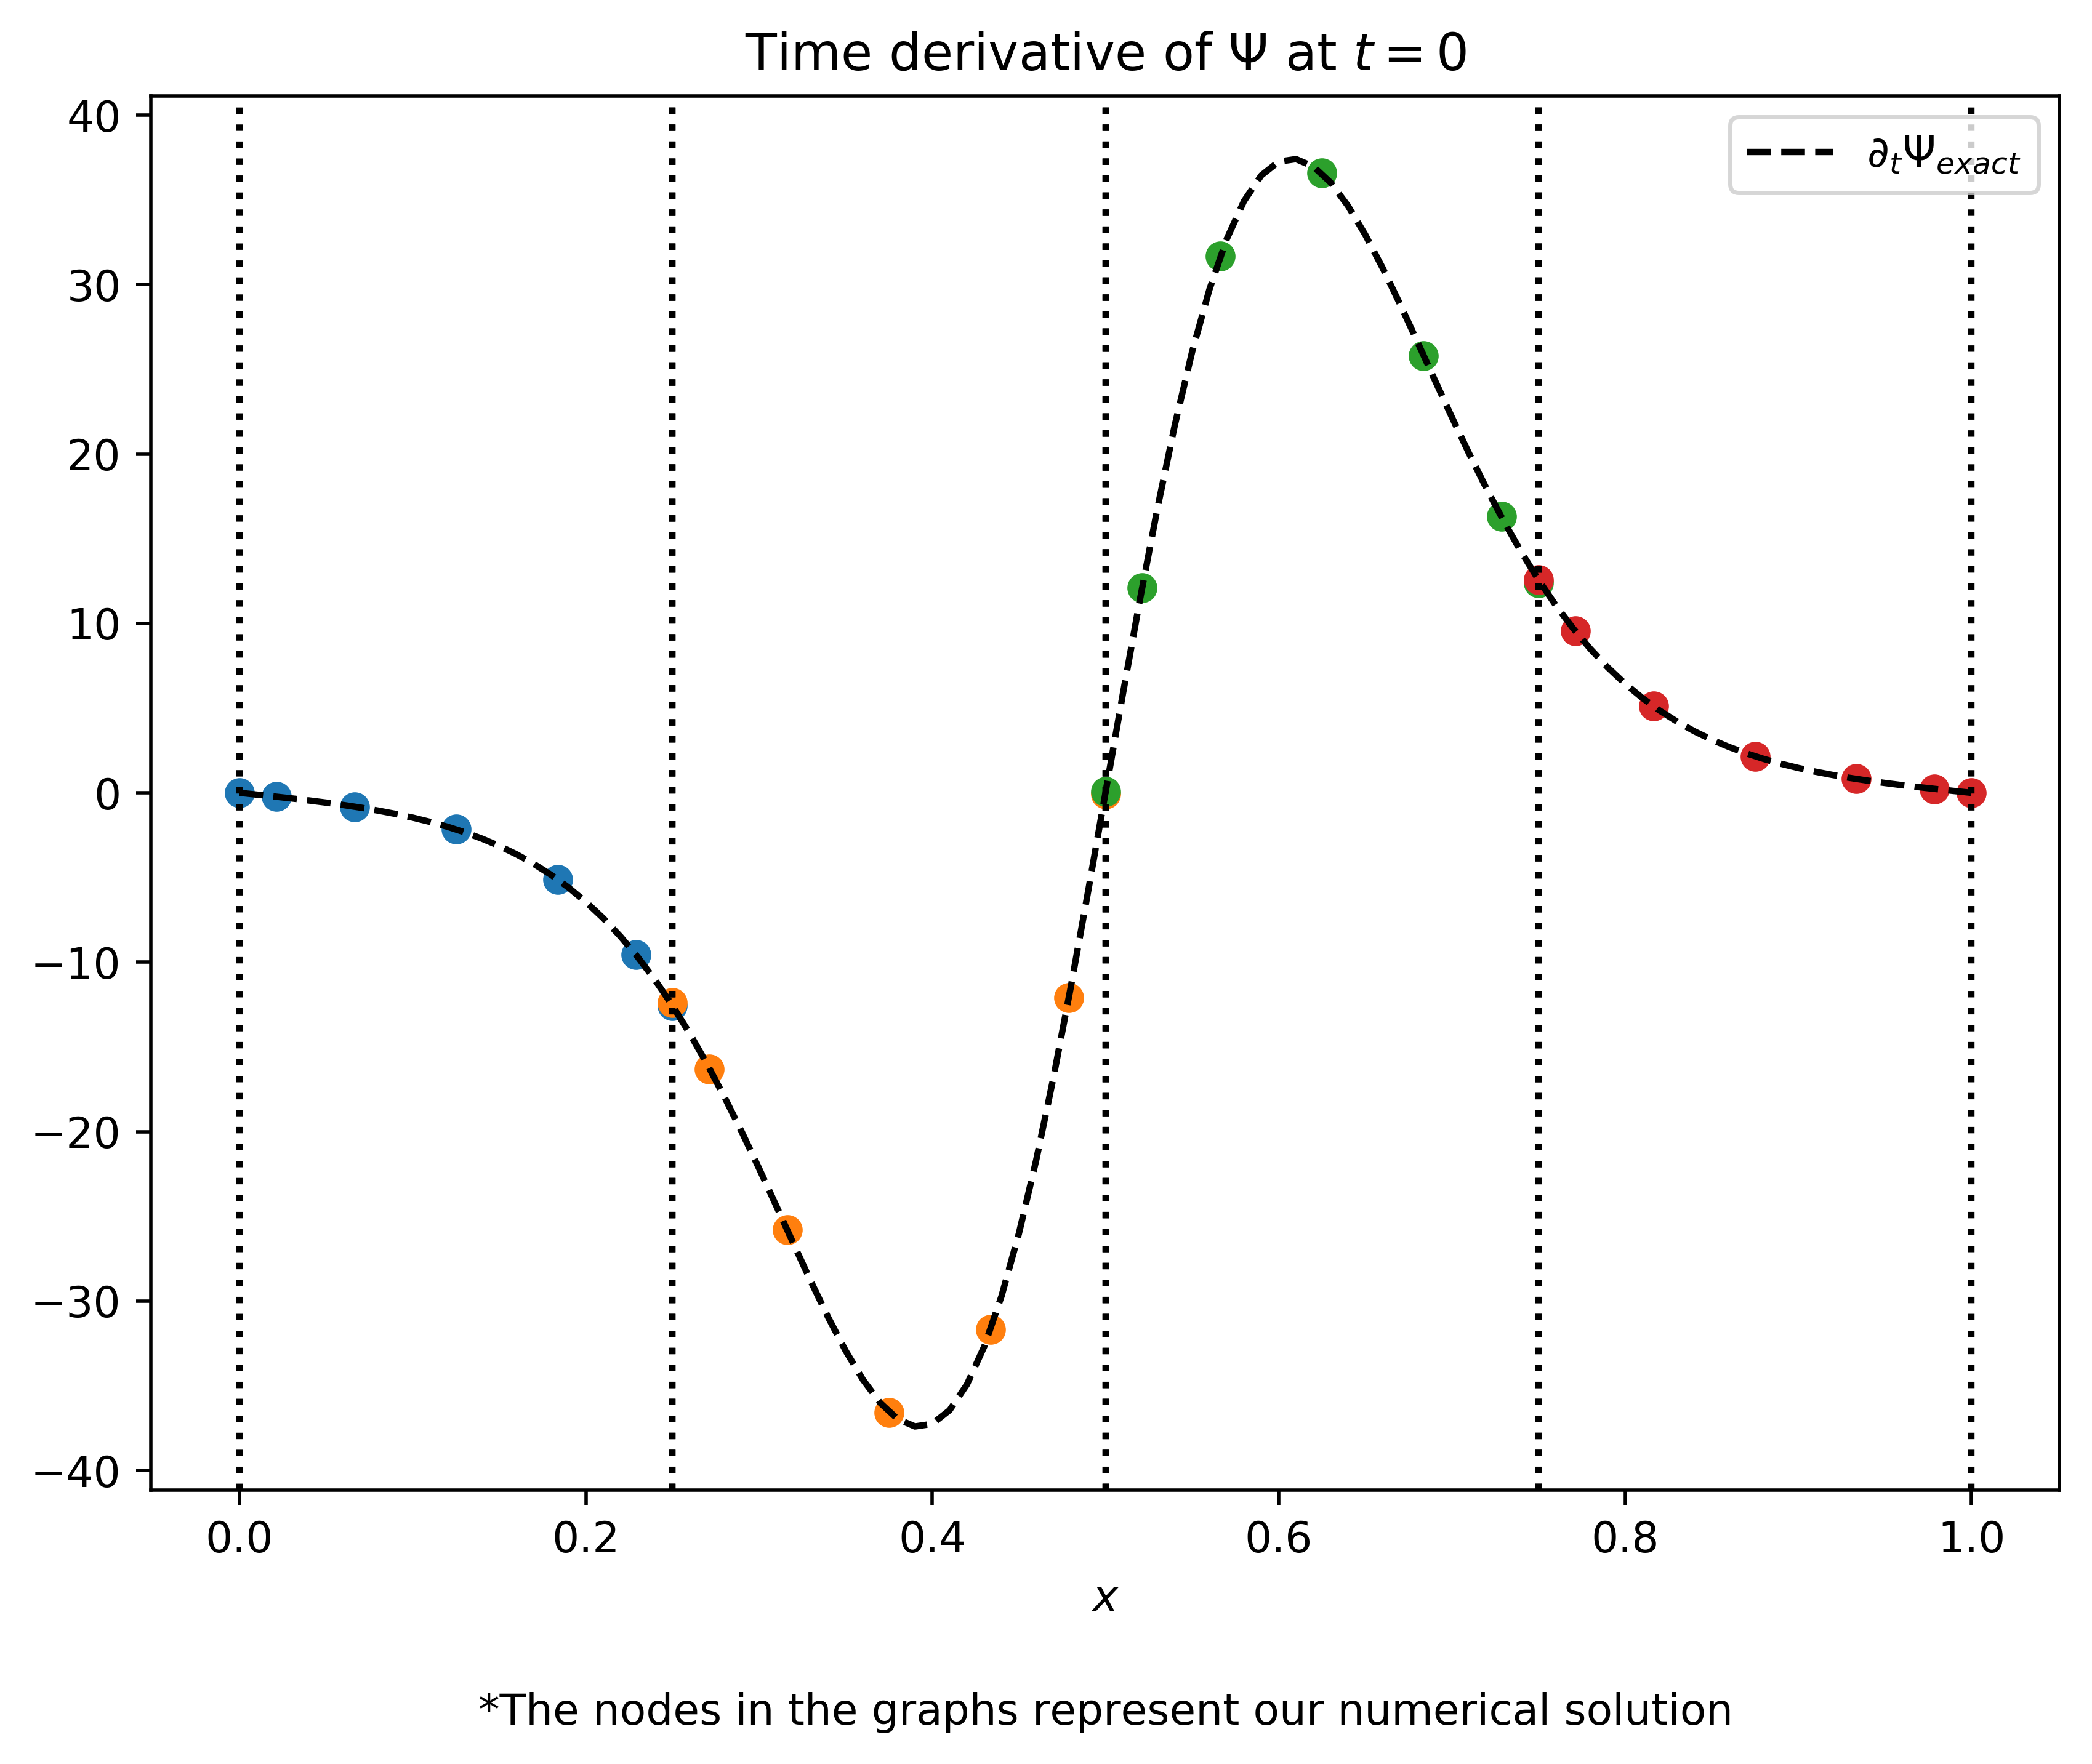

In [300]:
plt.figure(figsize=(8,6), dpi=500)
for i in range(len(derivative_0)):
    plt.scatter(x[i],derivative_0[i],marker ='o')
    plt.axvline(x[i][-1],ls=':', color = 'black')
    plt.axvline(x[i][0], ls =':',color = 'black')
plt.title(r'Time derivative of $\Psi$ at $t=0$')
plt.xlabel(r'$x$')
plt.plot(x_smooth, derivative_ic1(x_smooth,t), label = r'$\partial_{t}\Psi_{exact}$',ls = '--', color = 'black')
plt.text(0.5,-55,'*The nodes in the graphs represent our numerical solution', ha='center')
plt.legend()

In [301]:
T_final = 0.3
nt = int((T_final-t)/dt)

In [302]:
for n in range(nt):
        u = RK4_Step(dt,DG_du_dt,u, K,N,t,a,alpha,M_inv, M_inv_S)
        t = t + dt

In [303]:
t

0.2999267301094523

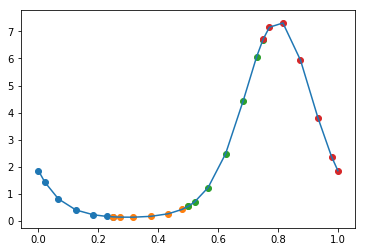

In [304]:
for i in range(len(x)):
    plt.scatter(x[i],u[i],marker = 'o')
plt.plot(x.flatten(), initial_condition_1(x,t).flatten())

# Big function test

In [306]:
t, u, x,dt = Evolve(0.,1.3, RK4_Step,DG_du_dt,2.**(-7),0.,1.,initial_condition_1,4,6,1.,1./2.)
x_smooth = np.linspace(start,end,101)

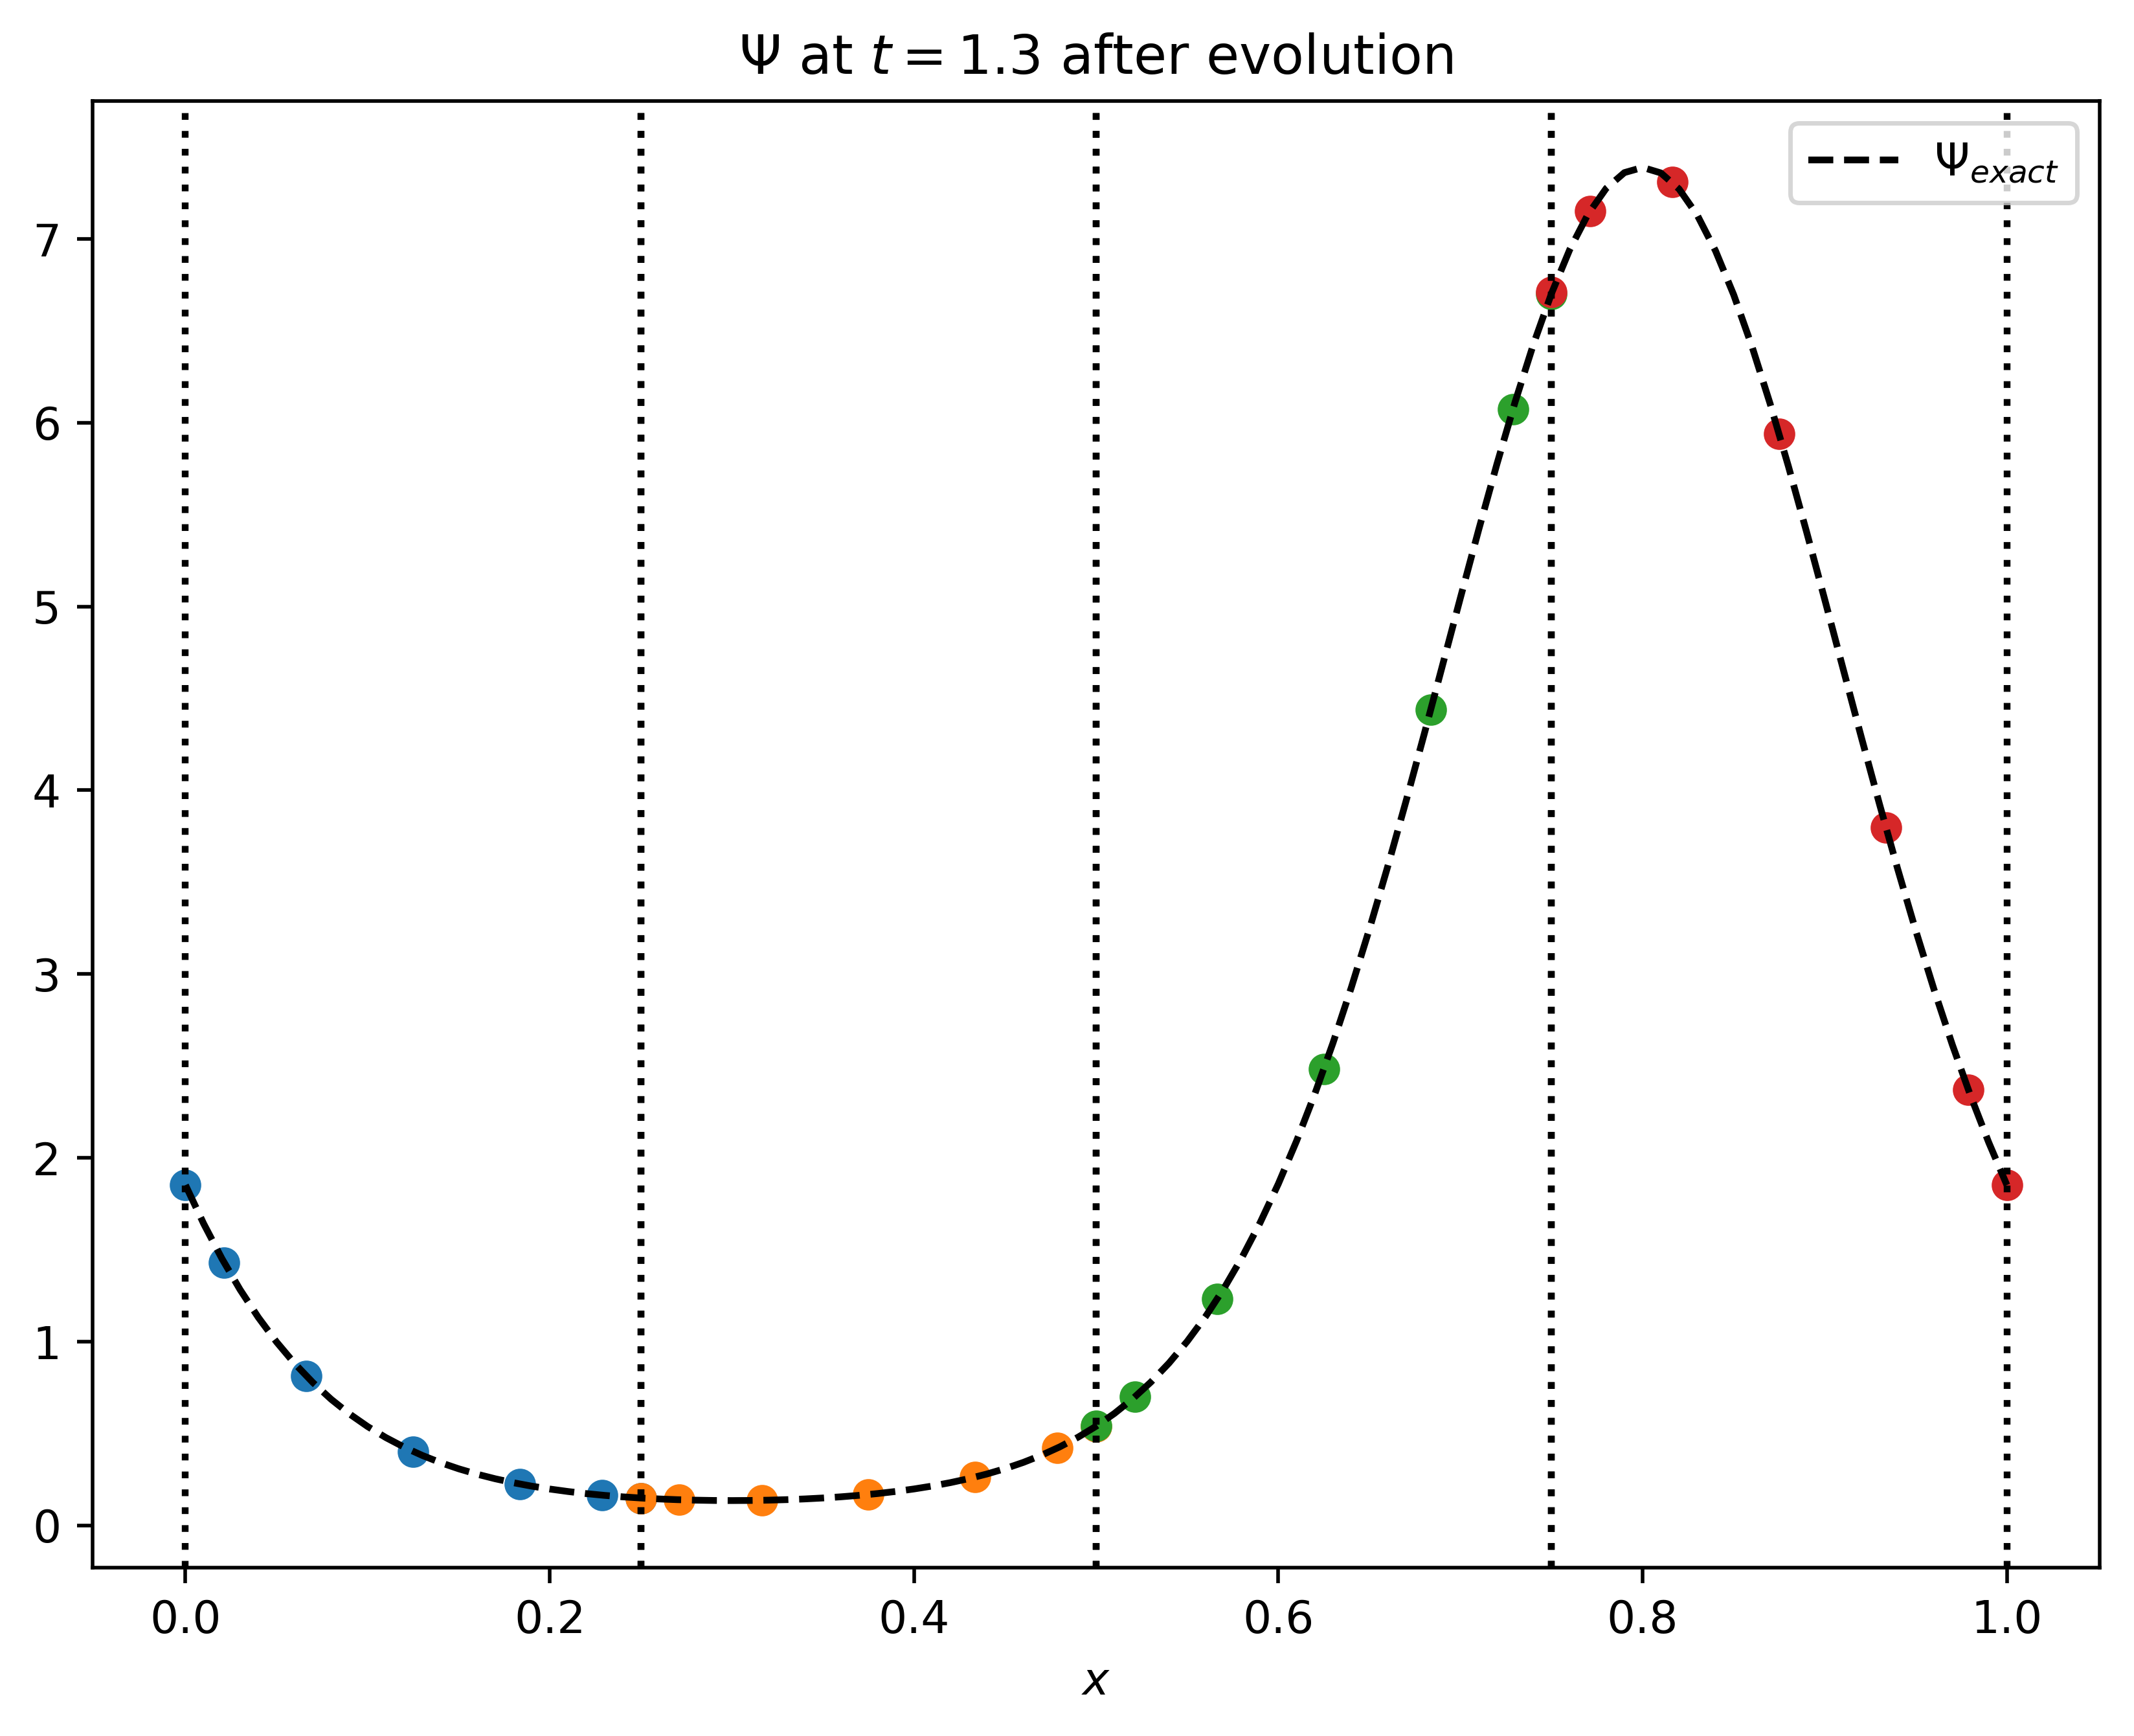

In [307]:
plt.figure(figsize=(8,6), dpi=500)

for i in range(len(x)):
    plt.scatter(x[i],u[i],marker = 'o')
    plt.axvline(x[i][-1],ls=':', color = 'black')
    plt.axvline(x[i][0], ls =':',color = 'black')
plt.xlabel(r'$x$')
plt.title(r'$\Psi$ at $t=1.3$ after evolution' )
plt.plot(x_smooth.flatten(), initial_condition_1(x_smooth,t).flatten(),ls = '--', label = r'$\Psi_{exact}$',color = 'black')
plt.legend()


# Convergence Test

In [73]:
K_range = [2,4,6,8,10,12,14,16,18,20]
N_range = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
t_final = 0.3
X,Y = np.meshgrid(K_range,N_range)
Z = np.zeros((len(N_range),len(K_range)))

In [74]:
for j in range(len(N_range)):
    for i in range(len(K_range)):
        evolved = Evolve(0.,0.3,RK4_Step,DG_du_dt,2.**(-7),0.,1.,initial_condition_1,K_range[i],N_range[j],1.,1./2.)
        numerical_middle = evolved[1][int(K_range[i]//2)][0]
        analytical_middle = initial_condition_1(0.5,evolved[0])
        Z[j][i] = np.abs((numerical_middle - analytical_middle)/analytical_middle)

Text(0.5, 1.0, 'Discontinuous Galerkin Method rate of convergence')

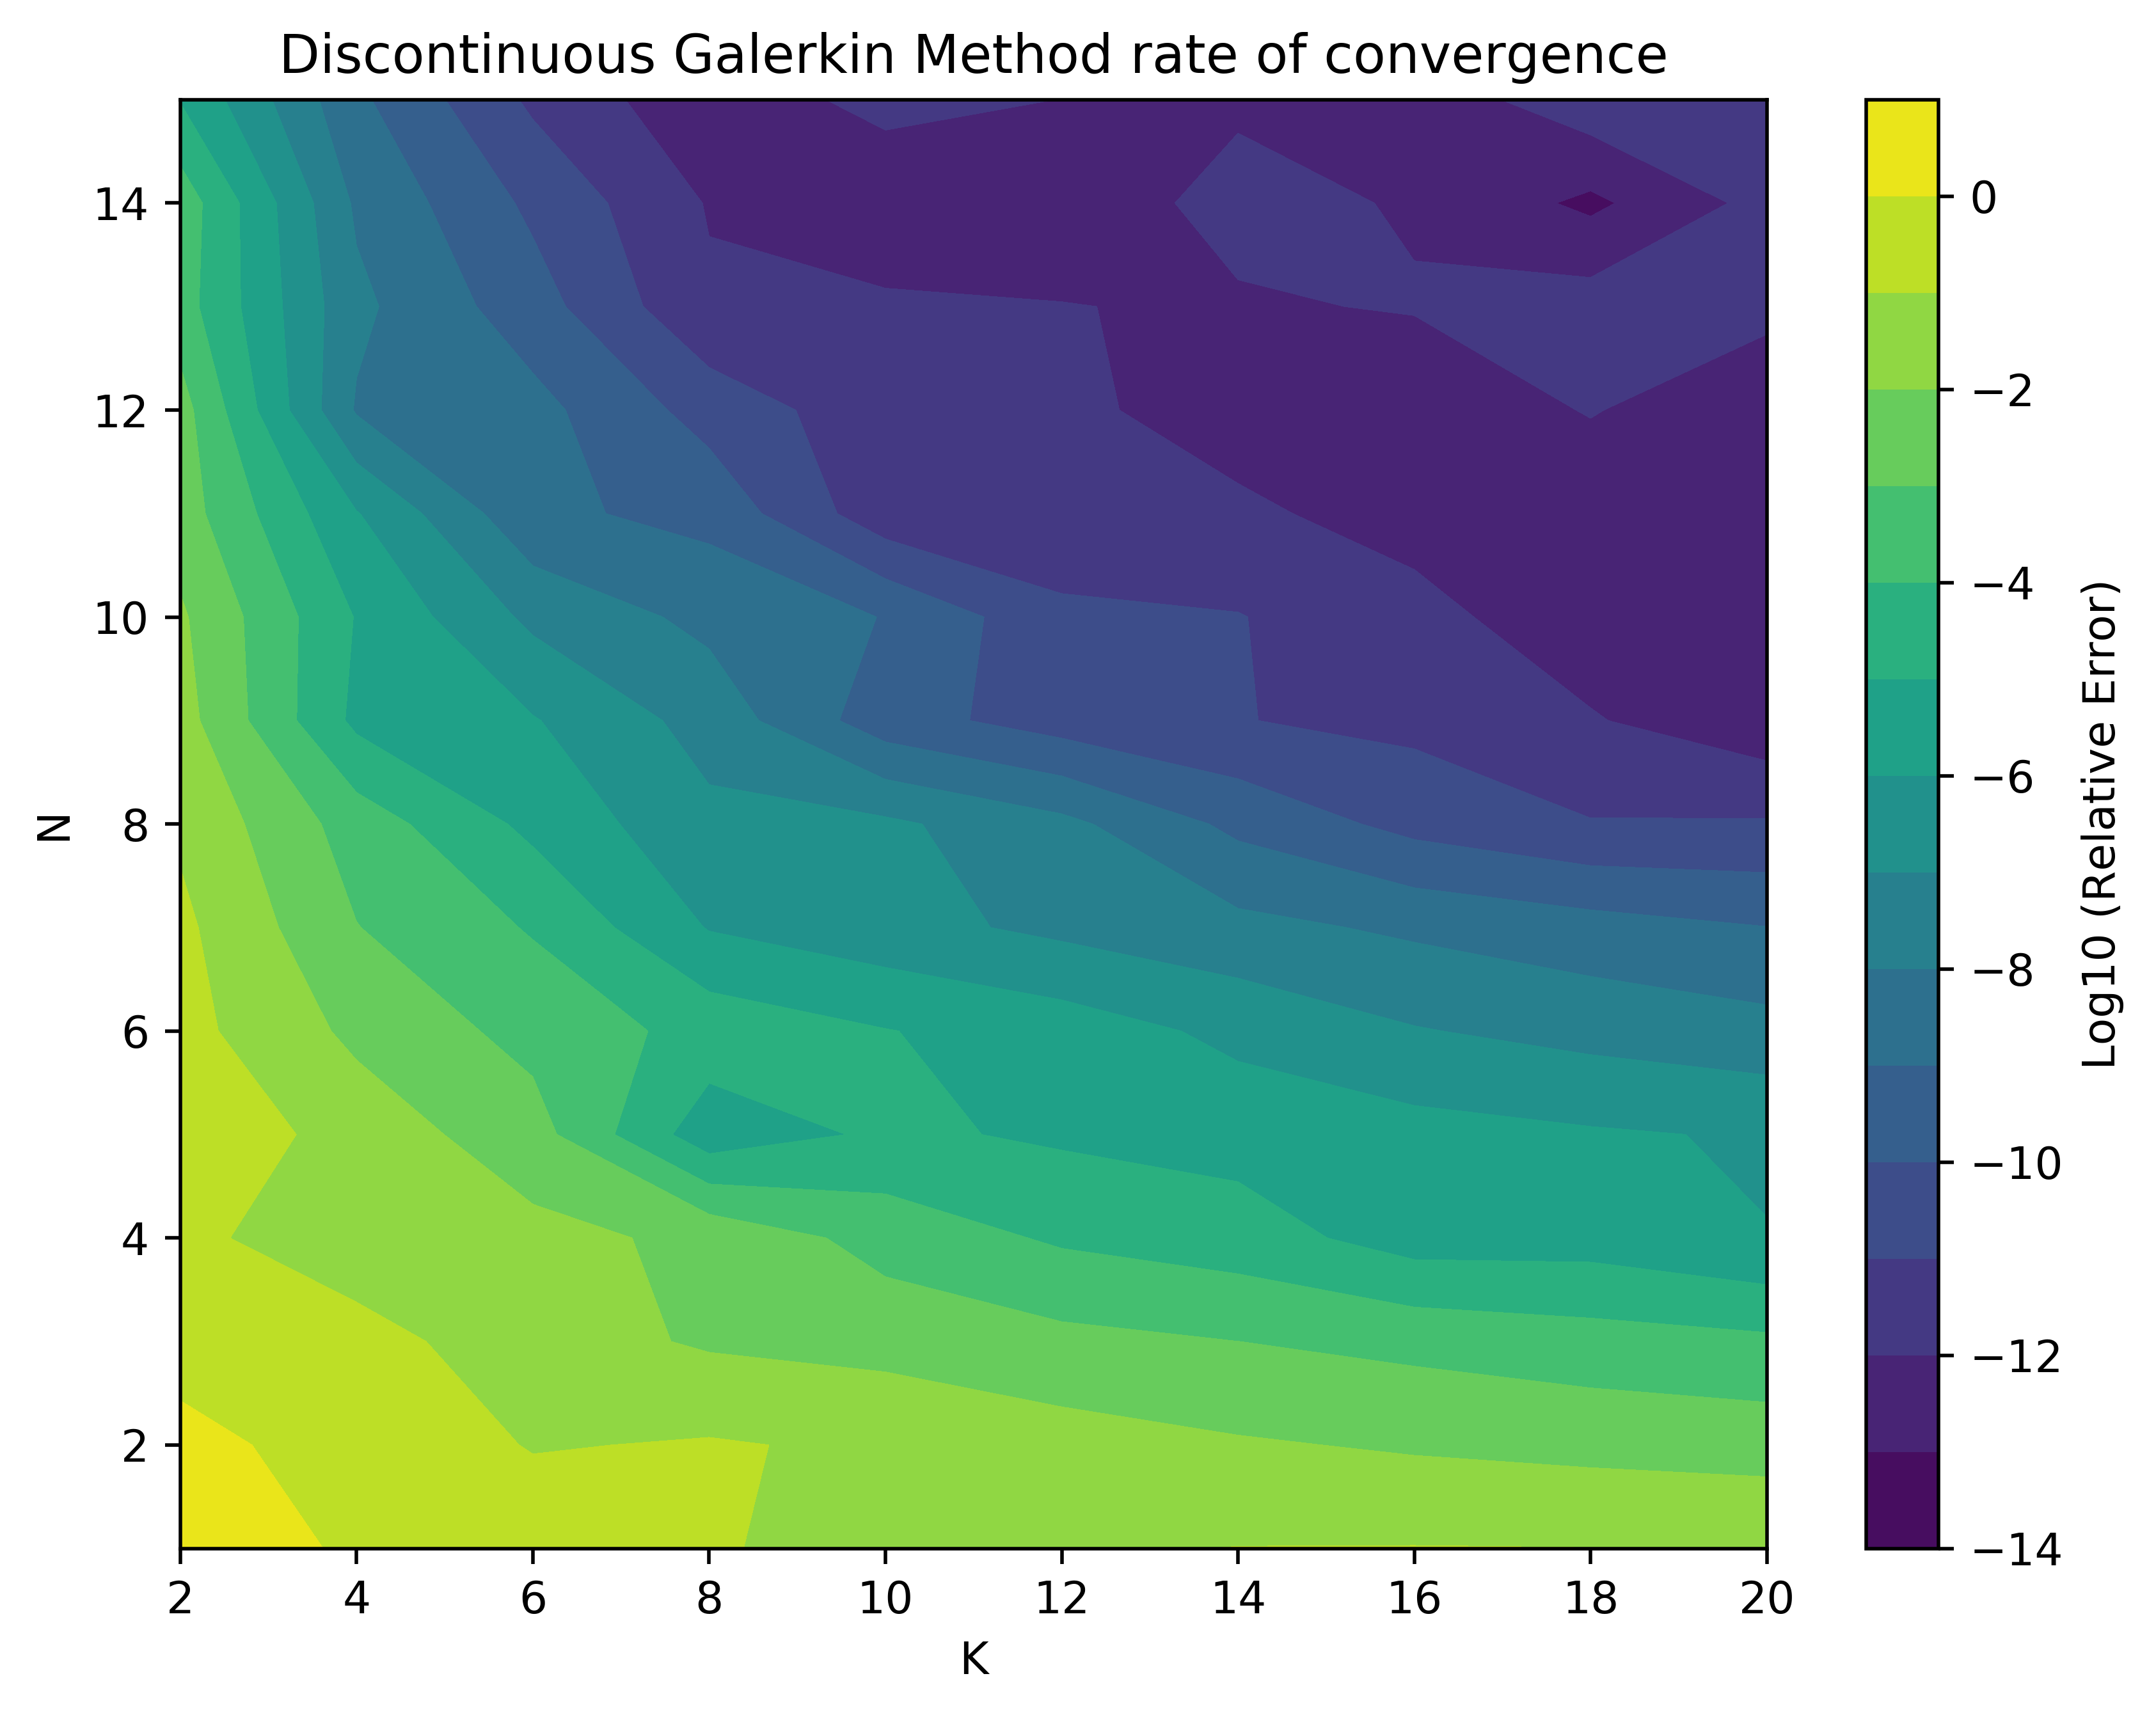

In [200]:
plt.figure(figsize=(8,6), dpi=500)
plt.contourf(X,Y,np.log10(Z),16,alpha = 1,cmap=cm.viridis)
plt.colorbar(label = 'Log10 (Relative Error)')
# plt.contour(X,Y,Z, cmap = cm.viridis)
plt.xlabel('K')
plt.ylabel('N')
plt.title('Discontinuous Galerkin Method rate of convergence')

Text(0.5, 1.0, 'Discontinuous Galerkin Method')

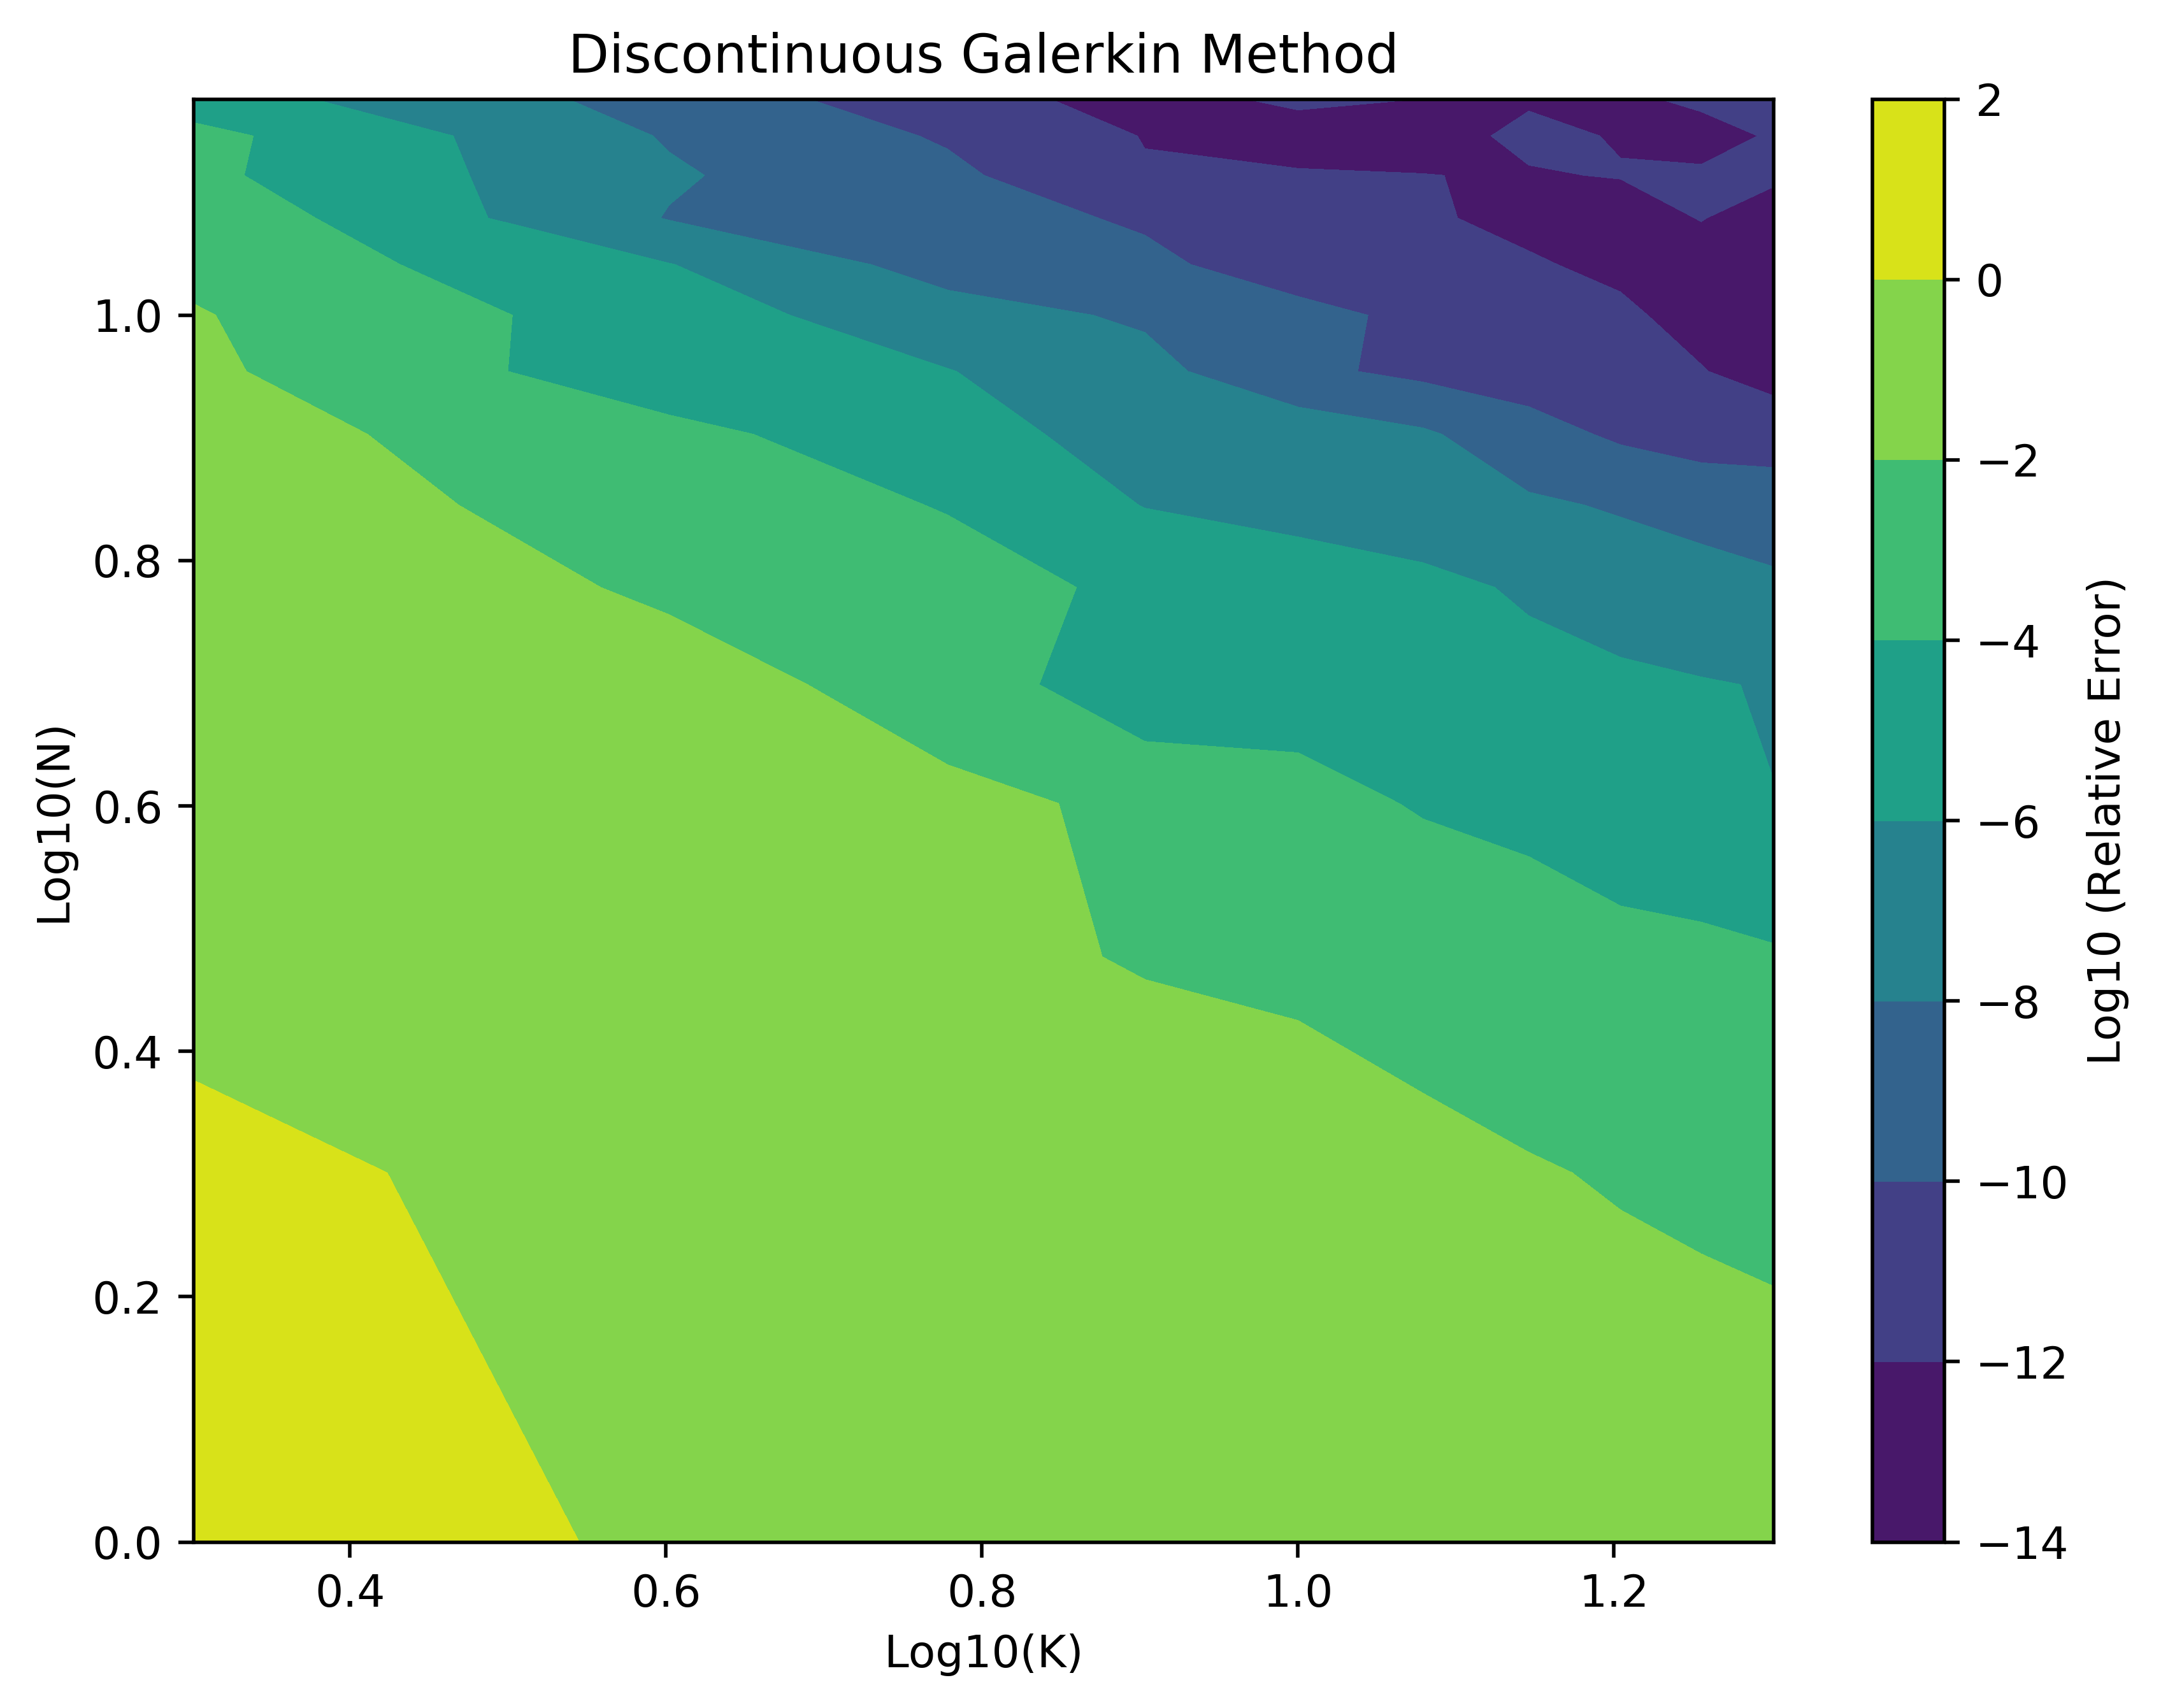

In [196]:
plt.figure(figsize=(8,6), dpi=500)
plt.contourf(np.log10(X),np.log10(Y),np.log10(Z),8,alpha = 1,cmap=cm.viridis)
plt.colorbar(label = 'Log10 (Relative Error)')
# plt.contour(X,Y,Z, cmap = cm.viridis)
plt.xlabel('Log10(K)')
plt.ylabel('Log10(N)')
plt.title('Discontinuous Galerkin Method')

In [83]:
# print(Z.shape)
# Z

In [154]:
# #original convergence test
# CF_array = np.array([2.**(-n) for n in range(2,7)])
# N_range = np.array([2,4,6,8,10])
# error_whole = []
# dt_whole = []
# for N in N_range:
#     error_in_middle = []
#     dt_array = []
#     for CF in CF_array:
#         evolved = Evolve(0.,0.8,RK4_Step,DG_du_dt,CF,0.,1.,initial_condition_1,10,N,1.,1./2.)
#         dt = evolved[3]
#         dt_array.append(dt)
#         numerical_middle = evolved[1][int(K//2)][0]
#         analytical_middle = initial_condition_1(evolved[2][int(K//2)][0],evolved[0])
#         error = np.abs((numerical_middle - analytical_middle)/analytical_middle)
#         error_in_middle.append(np.log10(error))
#     error_whole.append(error_in_middle)
#     dt_whole.append(dt_array)
#     plt.plot(np.log10(dt_array),error_in_middle, label = 'N = '+str(N), marker ='o')


In [153]:
# plt.figure(figsize=(8,6), dpi=500)
# for i in range(len(dt_whole)):
#     plt.plot(np.log10(dt_whole[i]),error_whole[i], label = 'N = '+str(N_range[i]),marker = 'o')
# plt.title('Discontinuous Galerkin Method with K = 10')
# plt.ylabel(r'$log_{10} (\delta \Psi)$')
# plt.xlabel(r'$log_{10} (dt)$')
# plt.legend()

In [149]:
evolved_test = Evolve(0.,0.8,RK4_Step,DG_du_dt,2.**(-7),0.,1.,initial_condition_1,10,4,1.,1./2.)


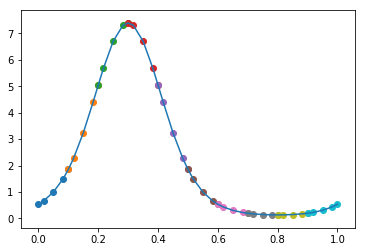

In [150]:
for i in range(len(evolved_test[2])):
    plt.scatter(evolved_test[2][i],evolved_test[1][i],marker = 'o')
plt.plot(evolved_test[2].flatten(), initial_condition_1(evolved_test[2],evolved_test[0]).flatten())